In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

In [2]:
labels_df = pd.read_csv('labels.csv')
labels = np.array(labels_df[' hemorrhage'].tolist())

files = sorted(glob.glob('head_ct/*.png'))
images = np.array([cv2.imread(path) for path in files])

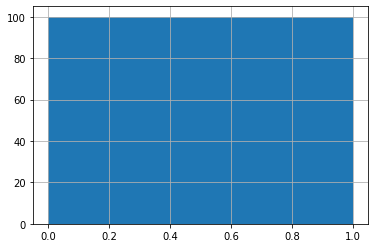

In [4]:
labels_df[' hemorrhage'].hist(bins=2)


In [5]:
train = pd.read_csv(r"C:\Users\Nanda Kumar\Downloads\head-ct-hemorrhage\labels.csv")

In [6]:
train.head(10)

,id,hemorrhage
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


In [7]:
train.shape

(200, 2)

In [8]:
images_df = pd.DataFrame(images, columns=['image'])

In [9]:
images_df['width'] = images_df['image'].apply(lambda x: x.shape[0])
images_df['height'] = images_df['image'].apply(lambda x: x.shape[1])

In [10]:
images = np.array([cv2.resize(image, (128, 128)) for image in images])

In [11]:
## prediction of single new data
import numpy as np
import keras
from keras.preprocessing import image
import PIL

Using TensorFlow backend.


In [12]:
test_image=image.load_img('head_ct/head_ct/000.png',target_size=(250,250))

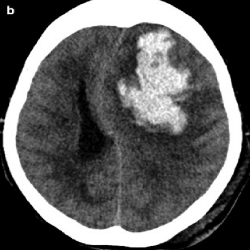

In [13]:
test_image

In [14]:
test_image=image.load_img('head_ct/head_ct/199.png',target_size=(250,250))

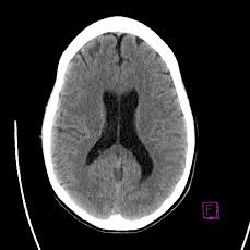

In [15]:
test_image

In [16]:
def resnet_50():
    weights_path = pretrained_models_path + pretrained_models["resnet_50"]["weights"]
    net = ResNet50(include_top=False, weights=weights_path)
    for layer in net.layers:
        layer.trainable = False
    return net

def vgg_16():
    weights_path = pretrained_models_path + pretrained_models["vgg_16"]["weights"]
    net = VGG16(include_top=False, weights=weights_path)
    for layer in net.layers:
        layer.trainable = False
    return net

In [17]:
IMAGE_SIZE = 64
# Base model with MobileNetV2
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [18]:
base_model = keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from os import listdir

from skimage.transform import resize

from sklearn.model_selection import train_test_split

from keras.applications import ResNet50, VGG16
from keras.applications.resnet50 import preprocess_input as preprocess_resnet_50
from keras.applications.vgg16 import preprocess_input as preprocess_vgg_16
from keras.layers import GlobalAveragePooling2D, Dense, Activation, concatenate
from keras.initializers import glorot_normal
from keras.regularizers import l2
from keras.models import Model
from keras.utils import Sequence


import tensorflow as tf

listdir("c:/Users/Nanda Kumar/Downloads/head-ct-hemorrhage/")

['.ipynb_checkpoints',
 'head_ct',
 'head_ct.zip',
 'labels.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb']

In [21]:
base_model.trainable = False

In [22]:
# Trainable classification head
maxpool_layer = keras.layers.GlobalMaxPooling2D()
prediction_layer = keras.layers.Dense(1, activation='sigmoid')

In [23]:
#learning_rate = 0.0001

classifier = keras.Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])

In [24]:
classifier.compile(optimizer=keras.optimizers.Adam(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [26]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
## Importing training data
train_set = train_datagen.flow_from_directory("c:/Users/Nanda Kumar/Downloads/head-ct-hemorrhage/",
                                               target_size=(64,64),
                                               batch_size=6,
                                               class_mode='binary')

Found 200 images belonging to 2 classes.


In [28]:
label_map = (train_set.class_indices)
print(label_map)

{'.ipynb_checkpoints': 0, 'head_ct': 1}


In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [34]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=98,
        epochs=10,
        )

Epoch 1/10
98/98 [==============================] - 8s 77ms/step - loss: 0.1414 - accuracy: 0.9479
Epoch 2/10
98/98 [==============================] - 8s 81ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 3/10
98/98 [==============================] - 8s 85ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 4/10
98/98 [==============================] - 8s 83ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 5/10
98/98 [==============================] - 9s 90ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 6/10
98/98 [==============================] - 9s 90ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/10
98/98 [==============================] - 9s 87ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/10
98/98 [==============================] - 9s 94ms/step - loss: 9.0154e-04 - accuracy: 1.0000
Epoch 9/10
98/98 [==============================] - 8s 85ms/step - loss: 7.3191e-04 - accuracy: 1.0000
Epoch 10/10
98/98 [==============================] - 9s 92ms/step - loss: 6.3362e-04 - accuracy: 1.00

In [35]:
## prediction of single new data
import numpy as np
import keras
from keras.preprocessing import image

In [36]:
import PIL

In [37]:
test_image=image.load_img('head_ct/head_ct/000.png',target_size=(250,250))

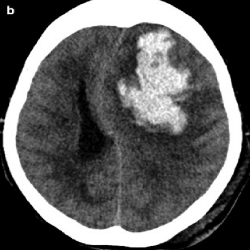

In [38]:
test_image

In [ ]:
## For single prediction change the dimension using axis. To remove problem of batch
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)

In [ ]:
## Class of normal and abnormal

if result[0][0] == 1:
    prediction = 'normal'
else:
   prediction = 'abnormal'

In [ ]:
prediction